In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from tqdm import tqdm
sys.path.append(os.path.join(os.getcwd(), ".."))
# from support.omniwheel_calculation_pd import *
from support.omniwheel_calculation import *
from datetime import datetime
from support.pd_support import *
from support.calculations_support import *
from support.ar_calculations import *
from numba import njit
import polars as pl
from support.imu_calculations import *
from scipy import integrate
import csv


In [7]:
_parent_folder = "imu_calib_raw_april_27_2023"
_base_pth = os.path.dirname(os.getcwd())
# _base_pth = os.path.dirname(_base_pth)
_base_pth = os.path.join(_base_pth,"recording_programs", "test_data", _parent_folder)
_file_names = os.listdir(_base_pth)
_base_pth

'c:\\Users\\Sujith\\Documents\\Projects\\armbo\\recording_programs\\test_data\\imu_calib_raw_april_27_2023'

In [8]:
_base_save_pth = os.path.join(os.getcwd(), "data")

#check if folder exists
if not os.path.exists(_base_save_pth):
    os.mkdir(_base_save_pth)

_save_pth = os.path.join(_base_save_pth, "calib2.txt")
_save_file = open(_save_pth, "w", newline='')
_csv_writer = csv.writer(_save_file, delimiter=",")

In [9]:
for i in _file_names:
    _csv_file_pth = os.path.join(_base_pth, i)
    df = pd.read_csv(_csv_file_pth)
    df = pl.from_pandas(df)
    _data = df[["ax", "ay", "az"]].median().to_numpy()[0]
    _csv_writer.writerow(_data)

In [10]:
_save_file.close()

In [2]:
df = pd.read_csv(r"C:\Users\CMC\Documents\openposelibs\pose\armbo\imu\data\calib1.csv", header=None, delimiter=" ")

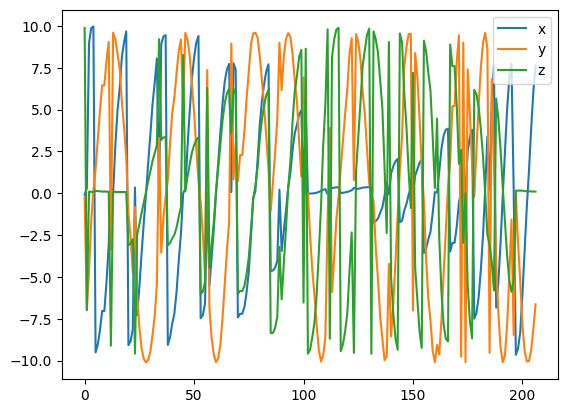

In [5]:
plt.plot(df[0], label="x")
plt.plot(df[1], label="y")
plt.plot(df[2], label="z")
plt.legend()